BIG MART SALES PREDICTION (TRAIN DATA->DATA PREPARATION)


In [57]:
#by Thasleem Arifa M(KRCE)-Train data 
#importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import the dataset

In [58]:
BIGMARTdata=pd.read_csv("C:/Users/Nazreen/AppData/Local/Temp/43a0f167-832c-4e1c-9048-5aa826cb3200_9961_14084_bundle_archive.zip.200/Train.csv")
BIGMARTdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
BIGMARTdata.shape

(8523, 12)

In [60]:
BIGMARTdata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [61]:
BIGMARTdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Data Cleaning and Exploration for each attribute

In [62]:
BIGMARTdata.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
BIGMARTdata.duplicated().any()

False

Item Weight

Handling the Missing Values using Univariate Imputation

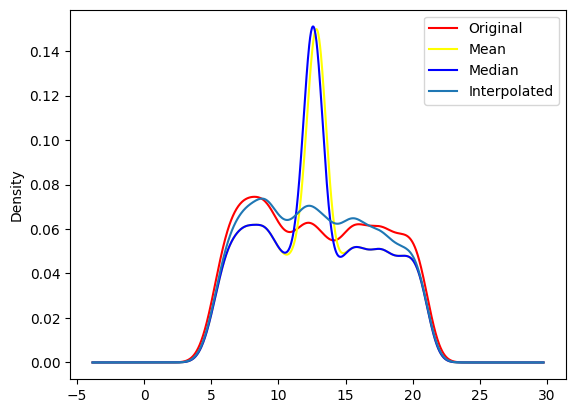

In [64]:
mean_wt=BIGMARTdata["Item_Weight"].mean()
median_wt=BIGMARTdata["Item_Weight"].median()
BIGMARTdata["Item_Weight_mean"]=BIGMARTdata["Item_Weight"].fillna(mean_wt)
BIGMARTdata["Item_Weight_median"]=BIGMARTdata["Item_Weight"].fillna(median_wt)
BIGMARTdata["Item_Weight_interpolation_imputation"]=BIGMARTdata["Item_Weight"].interpolate("linear")
BIGMARTdata["Item_Weight"].plot(kind="kde",color="red",label="Original")
BIGMARTdata["Item_Weight_mean"].plot(kind="kde",color="yellow",label="Mean")
BIGMARTdata["Item_Weight_median"].plot(kind="kde",color="blue",label="Median")
BIGMARTdata["Item_Weight_interpolation_imputation"].plot(kind="kde",label="Interpolated")
plt.legend()
plt.show()

We can notice that the mean,median have way lower variance compared to original

In [65]:
print(BIGMARTdata['Item_Weight'].var())
print(BIGMARTdata['Item_Weight_mean'].var())
print(BIGMARTdata['Item_Weight_median'].var())

21.561688259836558
17.86012173506058
17.869561454073647


<Axes: >

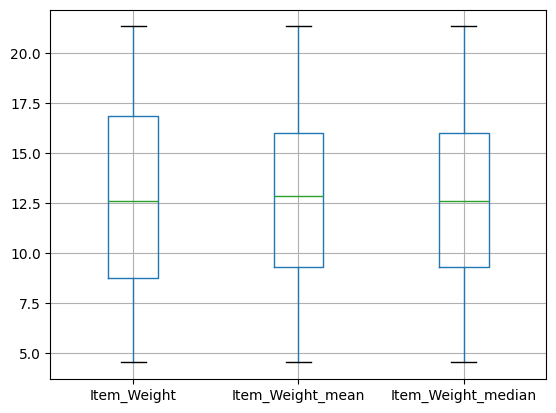

In [66]:
BIGMARTdata[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

From the above boxplot, we can conclude that the Item_Weight_mean & Item_Weight_median have lower variance compared to Item_weight.Therefore, we try to compare the variance between Item_weight & Item_Weight_interpolation_imputation.

<Axes: >

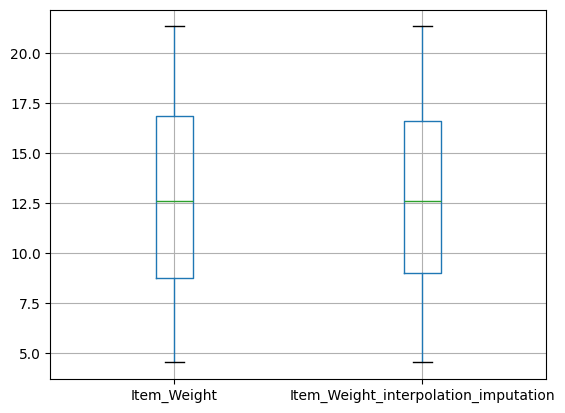

In [67]:
BIGMARTdata[['Item_Weight','Item_Weight_interpolation_imputation']].boxplot()

In [68]:
print(BIGMARTdata['Item_Weight'].var())
print(BIGMARTdata['Item_Weight_interpolation_imputation'].var())

21.561688259836558
19.758685821975472


Therefore,we choose Item_Weight_interpolation_imputation instead of 'Item_Weight_mean' & 'Item_Weight_median'.

In [69]:
data=BIGMARTdata.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median'],axis=1)


In [70]:
data.isnull().sum()

Item_Identifier                            0
Item_Fat_Content                           0
Item_Visibility                            0
Item_Type                                  0
Item_MRP                                   0
Outlet_Identifier                          0
Outlet_Establishment_Year                  0
Outlet_Size                             2410
Outlet_Location_Type                       0
Outlet_Type                                0
Item_Outlet_Sales                          0
Item_Weight_interpolation_imputation       0
dtype: int64

Outlet Size

In [71]:
data["Outlet_Size"]


0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [72]:
#We can notice that it is a categorical variable and must be replaced with numerical after filling null values using Bivariate Imputation
data['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Bivariate Imputation for filling the missing values

In [73]:
pivot_table = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
pivot_table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [74]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [75]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :pivot_table[x])
data.isnull().sum()

Item_Identifier                         0
Item_Fat_Content                        0
Item_Visibility                         0
Item_Type                               0
Item_MRP                                0
Outlet_Identifier                       0
Outlet_Establishment_Year               0
Outlet_Size                             0
Outlet_Location_Type                    0
Outlet_Type                             0
Item_Outlet_Sales                       0
Item_Weight_interpolation_imputation    0
dtype: int64

<Axes: >

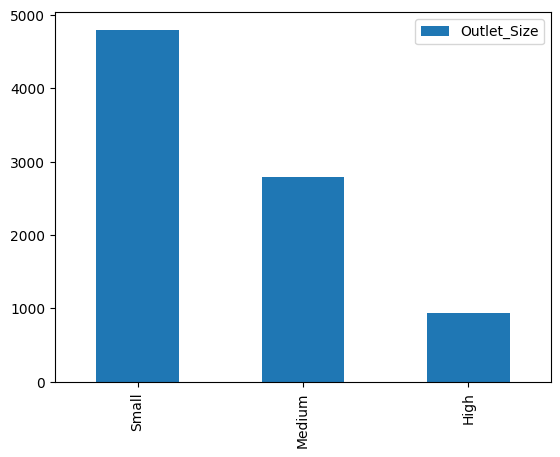

In [76]:
Os=pd.DataFrame(data['Outlet_Size'].value_counts())
Os.plot(kind="bar")

Item_Fat_Content

In [77]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolation_imputation'],
      dtype='object')

In [78]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<Axes: >

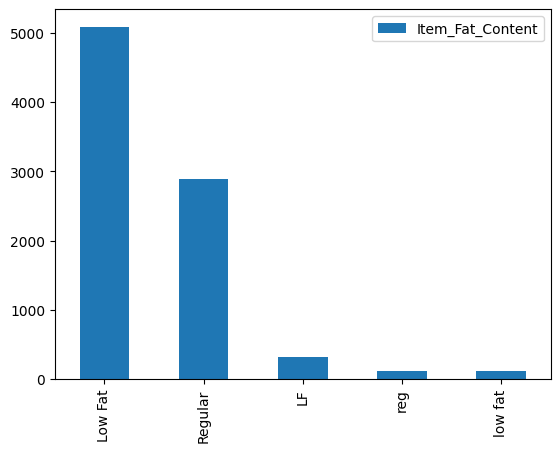

In [79]:
IF.plot(kind='bar')

In [80]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [81]:
data['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<Axes: >

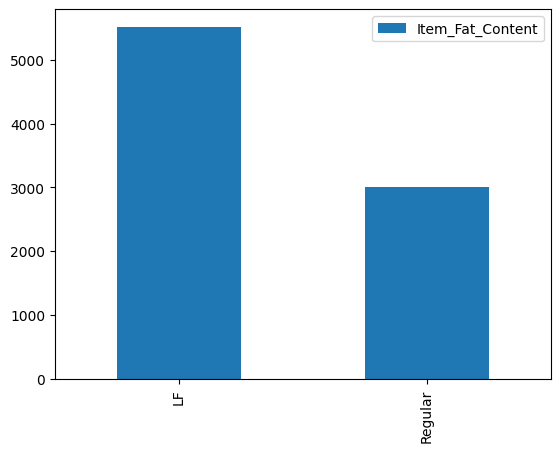

In [82]:
IF=pd.DataFrame(data['Item_Fat_Content'].value_counts())
IF.plot(kind='bar')

In [83]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolation_imputation'],
      dtype='object')

Item_Visibility

In [84]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [85]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [86]:
data['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

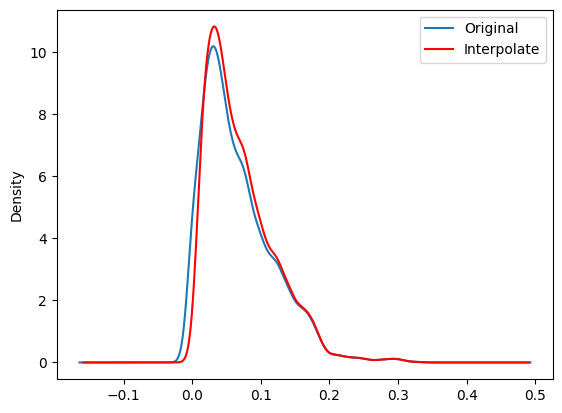

In [87]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [88]:
data = data.drop('Item_Visibility',axis=1)

In [89]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


Item_Type

In [90]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [91]:
IT=pd.DataFrame(data['Item_Type'].value_counts())
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<Axes: >

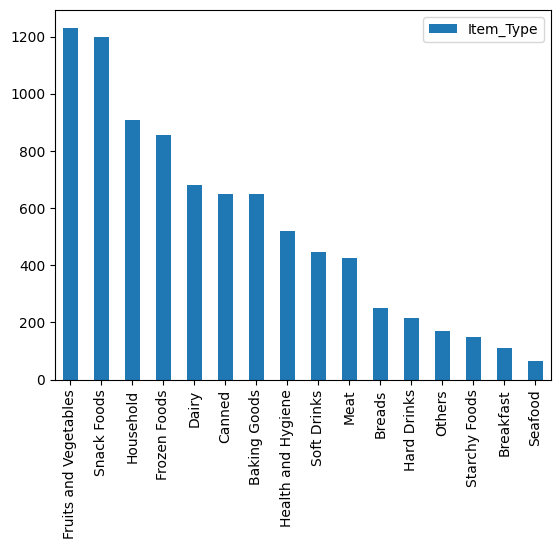

In [92]:
IT.plot(kind='bar')

Item_Identifier

In [93]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate'],
      dtype='object')

In [94]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [95]:
data['Item_Identifier_Grouped'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [96]:
data['Item_Identifier_Grouped'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_Grouped, dtype: int64

<Axes: >

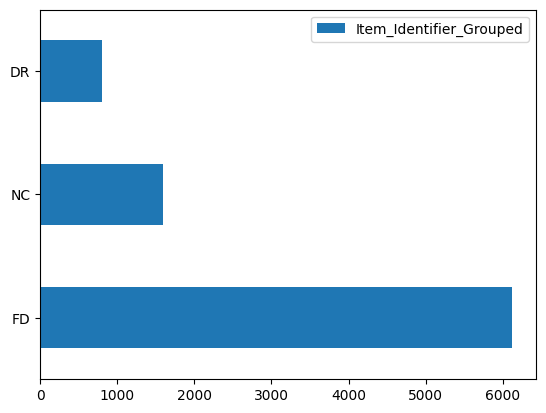

In [97]:
II=pd.DataFrame(data['Item_Identifier_Grouped'].value_counts())
II.plot(kind='barh')

Outlet_Establishment_Year

In [98]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolation_imputation', 'Item_Visibility_interpolate',
       'Item_Identifier_Grouped'],
      dtype='object')

In [99]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [100]:
import datetime as dt
current_year = dt.datetime.today().year
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,FD,25


<Axes: ylabel='Frequency'>

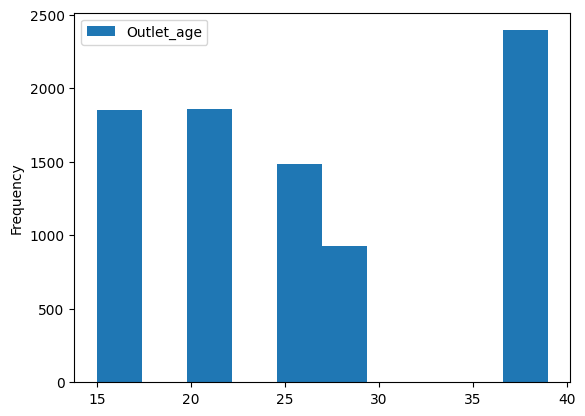

In [101]:
OA=pd.DataFrame(data['Outlet_age'])
OA.plot(kind='hist')

In [102]:
data = data.drop(['Outlet_Establishment_Year','Item_Identifier'],axis=1)

In [103]:
data.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,FD,25
1,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,DR,15
2,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,FD,25
3,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,FD,26
4,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,NC,37


Data Encoding and Labelling for handling categorical variables


In [104]:
from sklearn.preprocessing import OrdinalEncoder

encoded_data = data.copy()

cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    oe = OrdinalEncoder()
    encoded_data[col]=oe.fit_transform(encoded_data[[col]])
    print(oe.categories_)

[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]
[array(['DR', 'FD', 'NC'], dtype=object)]


In [105]:
encoded_data.head(3)
#therefore all the train data have been preprocessed and encoded

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,1.0,25
1,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,0.0,15
2,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,1.0,25


In [106]:
#For efficient prediction-to fit the model(seperation of input variable->X and target variable->y)
X = encoded_data.drop('Item_Outlet_Sales',axis=1)
y = encoded_data['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [107]:
X

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolation_imputation,Item_Visibility_interpolate,Item_Identifier_Grouped,Outlet_age
0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,1.0,25
1,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,0.0,15
2,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,1.0,25
3,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,1.0,26
4,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,2.0,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,1.0,37
8519,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,1.0,22
8520,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,2.0,20
8521,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,1.0,15
